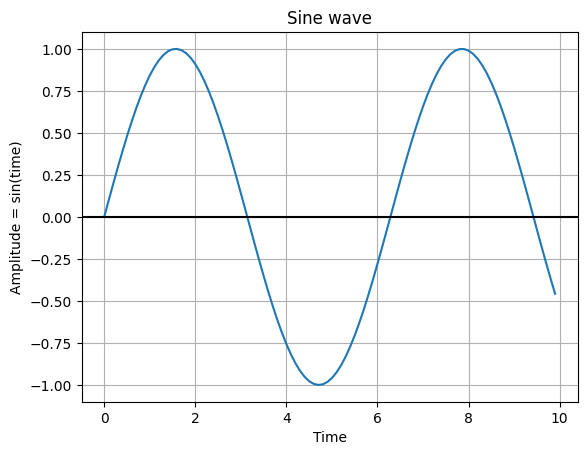

In [3]:
import matplotlib.pyplot as plot
import numpy as np
time        = np.arange(0, 10, 0.1);
# Amplitude of the sine wave is sine of a variable like time
amplitude   = np.sin(time)
# Plot a sine wave using time and amplitude obtained for the sine wave
plot.plot(time, amplitude)
# Give a title for the sine wave plot
plot.title('Sine wave')
# Give x axis label for the sine wave plot

plot.xlabel('Time')

# Give y axis label for the sine wave plot

plot.ylabel('Amplitude = sin(time)')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.show()
# Display the sine wave

plot.show()

Q= 3 b= [ 0.91954982 -1.592707    0.91954982] a= [ 1.         -1.592707    0.83909963]
b0= 0.91954981558864 b1= -1.5927070006901163 b2= 0.91954981558864
a0= 1.0 a1= -1.5927070006901163 a2= 0.83909963117728
Q= 1 b= [ 0.78867513 -1.3660254   0.78867513] a= [ 1.         -1.3660254   0.57735027]
Q= 10 b= [ 0.97448228 -1.68785283  0.97448228] a= [ 1.         -1.68785283  0.94896457]


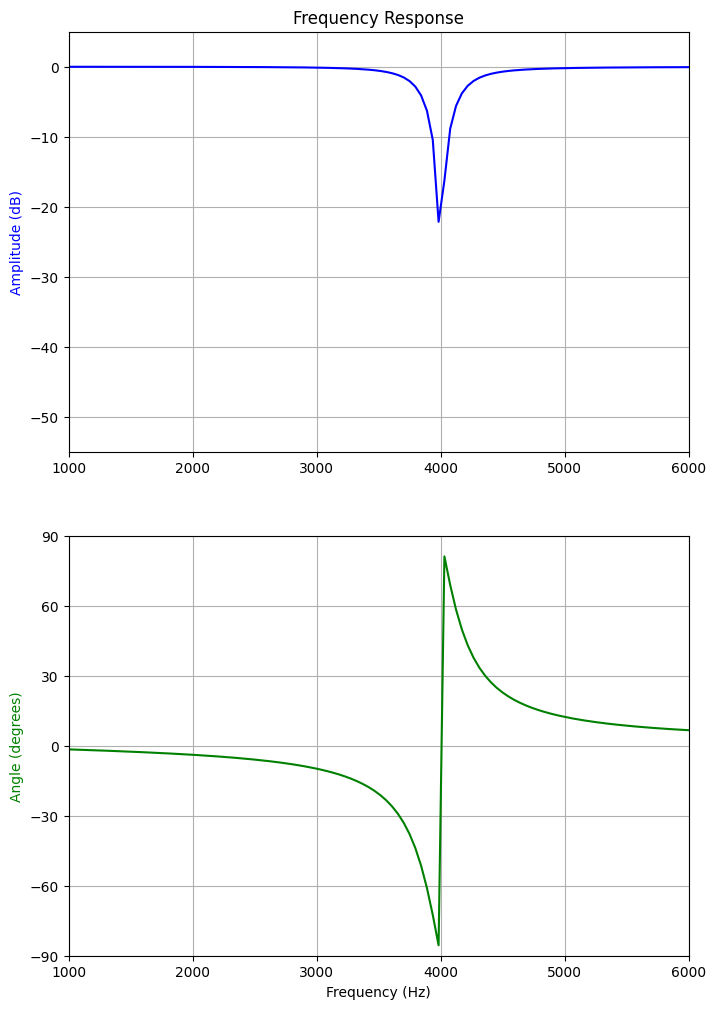

In [8]:
#notch filter
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
#1. design filter
fs = 48000.0
f0 = 4000.0 # notch frequency
Q  = 3  # Quality factor
b, a = signal.iirnotch(f0, Q, fs)
print ('Q=',Q,'b=',b,'a=',a)
print ('b0=',b[0],'b1=',b[1],'b2=',b[2])
print ('a0=',a[0],'a1=',a[1],'a2=',a[2])

Q  = 1
b, a = signal.iirnotch(f0, Q, fs)
print ('Q=',Q,'b=',b,'a=',a)
Q  = 10
b, a = signal.iirnotch(f0, Q, fs)
print ('Q=',Q,'b=',b,'a=',a)


# 2. Plot the frequency response
freq, h = signal.freqz(b=b, a=a, fs=fs)
fig, ax = plt.subplots(2, 1, figsize=(8, 12))
ax[0].plot(freq, 20*np.log10(abs(h)), color='blue')
ax[0].set_title("Frequency Response")
ax[0].set_ylabel("Amplitude (dB)", color='blue')
ax[0].set_xlim([1000, 6000])
ax[0].set_ylim([-55, 5])
ax[0].grid(True)
ax[1].plot(freq, np.unwrap(np.angle(h))*180/np.pi, color='green')
ax[1].set_ylabel("Angle (degrees)", color='green')
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_xlim([1000, 6000])
ax[1].set_yticks([-90, -60, -30, 0, 30, 60, 90])
ax[1].set_ylim([-90, 90])
ax[1].grid(True)
plt.show()

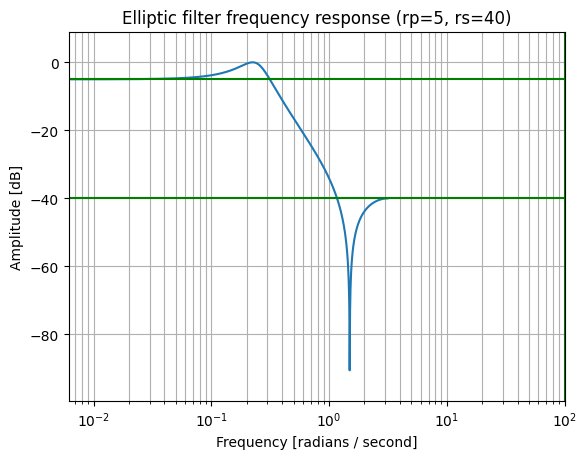

In [46]:
from scipy import signal
import matplotlib.pyplot as plt

b, a = signal.ellip(2, 5, 40, 100, 'low', analog=False,fs=2000)
w, h = signal.freqz(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Elliptic filter frequency response (rp=5, rs=40)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-40, color='green') # rs
plt.axhline(-5, color='green') # rp
plt.show()


fs= 48000.0 f0= 300.0 Q= 500.0
-------------------------
b= [ 3.92683661e-05  0.00000000e+00 -3.92683661e-05]
a= [ 1.         -1.9983796   0.99992146]
fs-= 48000.0 f0= 300.0 Q= 250
-------------------------
b= [ 7.85336485e-05  0.00000000e+00 -7.85336485e-05]
a= [ 1.         -1.99830113  0.99984293]


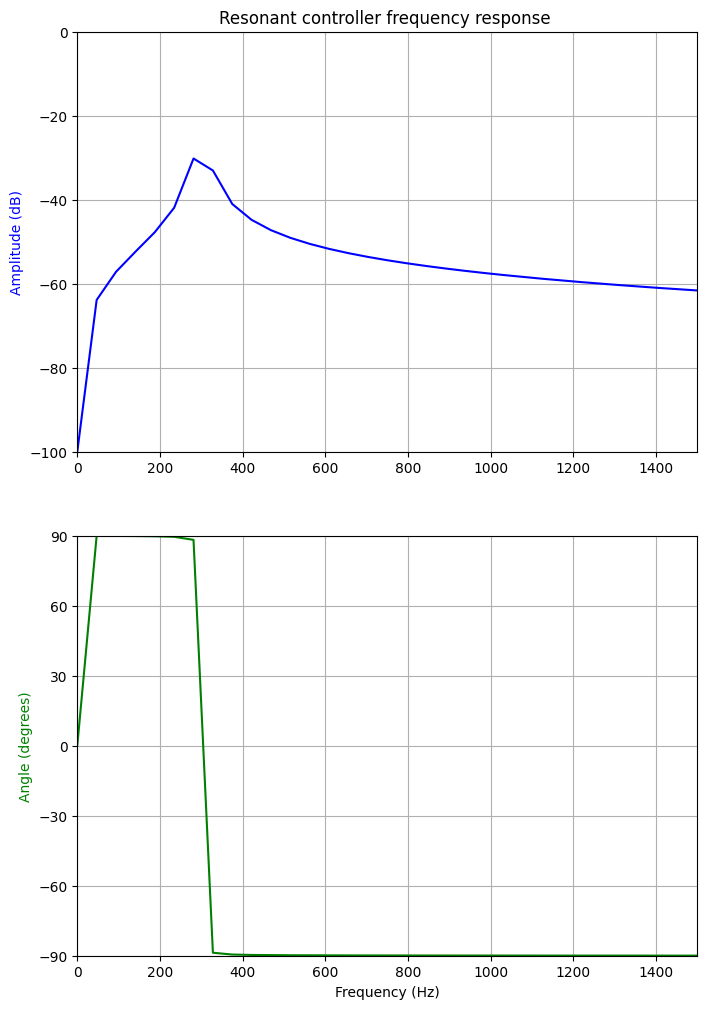

In [5]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
fs = 48000.0  # Sample frequency (Hz)
f0 = 300.0  # Frequency to be retained (Hz)
Q = 500.0  # Quality factor
# Design peak filter
b, a = signal.iirpeak(f0, Q, fs)
# Frequency response
print ('fs=',fs,'f0=',f0,'Q=',Q)
print ('-------------------------')
print ( 'b=',b )
print ( 'a=',a )
Q=250
b, a = signal.iirpeak(f0, Q, fs)
print ('fs-=',fs,'f0=',f0,'Q=',Q)
print ('-------------------------')
print ( 'b=',b )
print ( 'a=',a )

freq, h = signal.freqz(b, a, fs=fs)
# Plot
fig, ax = plt.subplots(2, 1, figsize=(8, 12))
ax[0].plot(freq, 20*np.log10(np.maximum(abs(h), 1e-5)), color='blue')
ax[0].set_title("Resonant controller frequency response ")
ax[0].set_ylabel("Amplitude (dB)", color='blue')
ax[0].set_xlim([0, fs/32])
ax[0].set_ylim([-100, 0])
ax[0].grid(True)
ax[1].plot(freq, np.unwrap(np.angle(h))*180/np.pi, color='green')
ax[1].set_ylabel("Angle (degrees)", color='green')
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_xlim([0, fs/32])
ax[1].set_yticks([-90, -60, -30, 0, 30, 60, 90])
ax[1].set_ylim([-90, 90])
ax[1].grid(True)
plt.show()

### 

fs-= 48000.0 f0= 300.0 Q= 250
-------------------------
b= [ 7.85336485e-05  0.00000000e+00 -7.85336485e-05]
a= [ 1.         -1.99830113  0.99984293]
########### EVC30KW CCL Peak filter F0= 300.0 Fs= 48000.0  Use K= 0.1   ###########

#define C_R300_GAIN (0.1f)
#define C_R300_A1 (1.9983011262776735f)
#define C_R300_A2 (-0.999842932703034f)
#define C_R300_B0 (7.853364848298128e-05f)
#define C_R300_B1 (0.0f)
#define C_R300_B2 (-7.853364848298128e-05f)
########### EVC30KW CCL K= 0.05   ###########

#define CA1 (1.7685034409228537f)
#define CA2 (-0.7685034409228538f)
#define CB0 (0.011650585025662314f)
#define CB1 (0.0001515141436100162f)
#define CB2 (-0.011499070882052298f)
PURPLE - EVC BLUE - it where it startoscilate GREN-NEW!!


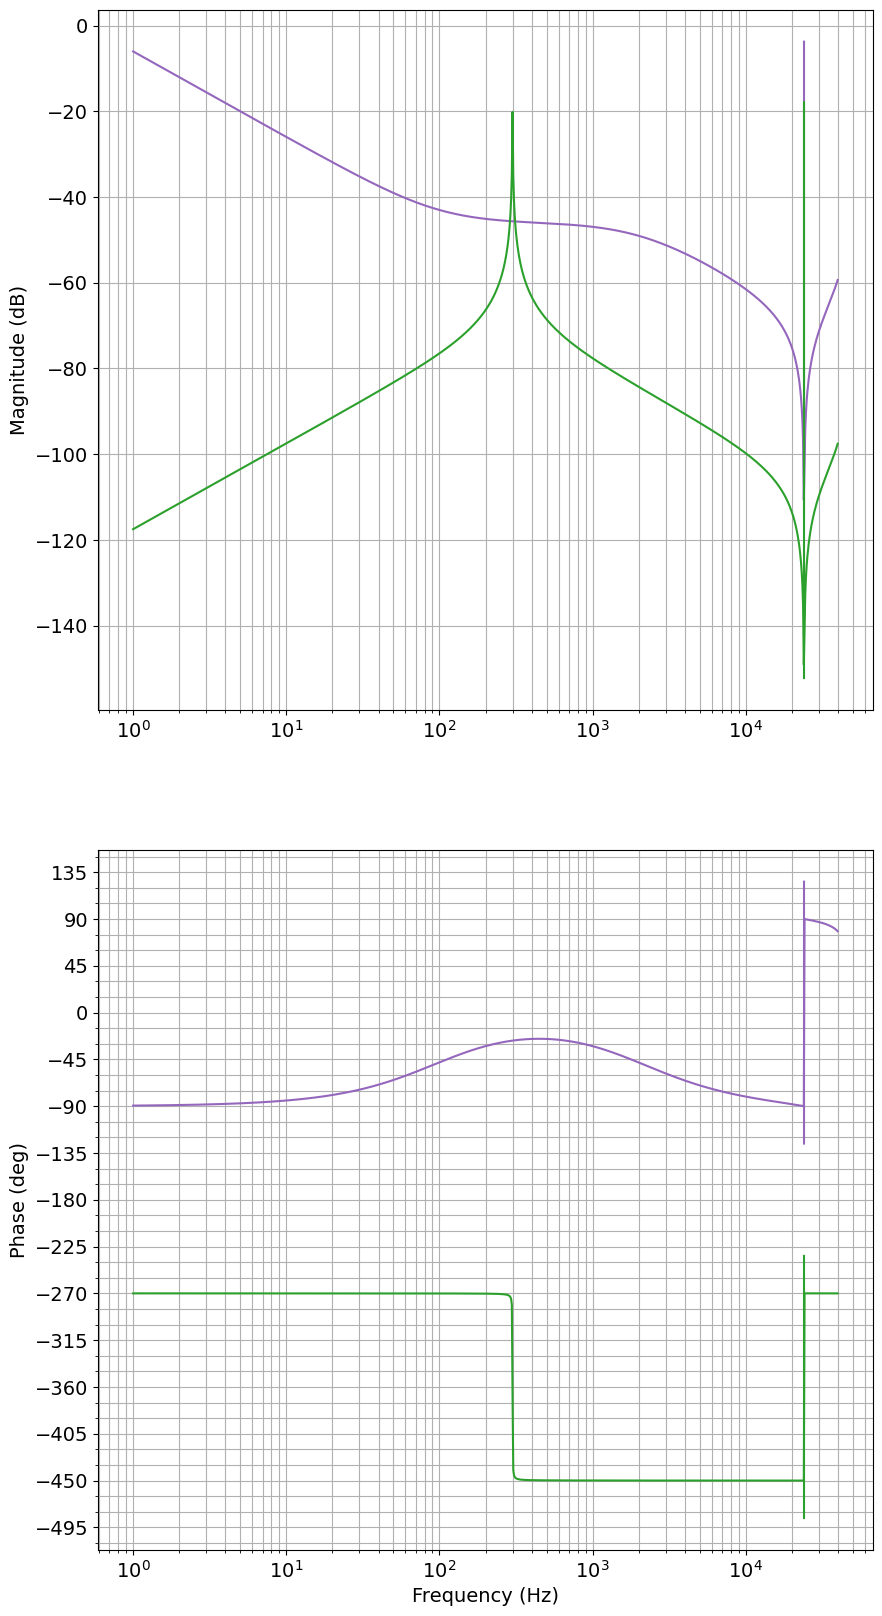

In [16]:
import numpy as np
from scipy import signal
import control
import matplotlib.pyplot as plt
import os

fs = 48000.0  # Sample frequency (Hz)
f0 = 300.0  # Frequency to be retained (Hz)
Q=250
k1=0.1
# Design peak filter
b, a = signal.iirpeak(f0, Q, fs)
print ('fs-=',fs,'f0=',f0,'Q=',Q)
print ('-------------------------')
print ( 'b=',b )
print ( 'a=',a )
######################
print("########### EVC30KW CCL Peak filter F0=",f0, "Fs=",fs," Use K=",k1,"  ###########\n")
print(f"#define C_R300_GAIN ({k1}f)")
      
print(f"#define C_R300_A1 ({-a[1]}f)")
print(f"#define C_R300_A2 ({-a[2]}f)")
print(f"#define C_R300_B0 ({b[0]}f)")
print(f"#define C_R300_B1 ({b[1]}f)")
print(f"#define C_R300_B2 ({b[2]}f)")


################
## EVC CCL
################
Fsw = 48000 #Hz
Fp0 = 10#Hz
Fz1 = 100 #Hz
Fp1 = 2000 #Hz
# Fp1 = 5000 #Hz

Ts = (1/Fsw)
Wp0=(Fp0*2*np.pi)
Wz1=(Fz1*2*np.pi)
Wp1=(Fp1*2*np.pi)

k=0.05
B0 = ((Ts*Wp0*Wp1*(2+Ts*Wz1)) / (2*(2+Ts*Wp1)*(Wz1)))
B1 = ((Ts*Ts*Wp0*Wp1) / (2+Ts*Wp1))
B2 = ((Ts*Wp0*Wp1*(-2+Ts*Wz1)) / (2*(2+Ts*Wp1)*Wz1))
A0 = 1
A1 = (4 / (2+Ts*Wp1))
A2 = (-2+Ts*Wp1) / (4 / 2+Ts*Wp1)
print("########### EVC30KW CCL K=",k,"  ###########\n")
print(f"#define CA1 ({A1}f)")
print(f"#define CA2 ({A2}f)")
print(f"#define CB0 ({B0}f)")
print(f"#define CB1 ({B1}f)")
print(f"#define CB2 ({B2}f)")

##################
#create plots
##################
f = np.logspace(0,4.6,1000)
f.min()
f.max()
len(f)
w = 2*np.pi*f
s = control.TransferFunction.s

plt.rcParams['font.size'] = 14
plt.rcParams["figure.figsize"] = 10.0,20.0

hIIRReversedEVC      = control.tf([B0 *k  , B1 *k  , B2 *k  ],  [A0  , -A1  , -A2  ], Ts)
hIIR300HzResonant    = control.tf([b[0]*k1, b[1]*k1, b[2]*k1],  [a[0], a[1], a[2]], Ts)

print ("PURPLE - EVC BLUE - it where it startoscilate GREN-NEW!!")
bodeIIRReversed = control.bode(hIIRReversedEVC, w, dB=1,Hz=1,color ='tab:purple')
bodeIIRReversed = control.bode(hIIR300HzResonant, w, dB=1,Hz=1,color ='tab:green')
